In [1]:
import numpy as np # improved arrays
from numba import jit # makes code faster

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#%%timeit
@jit(nopython=True)
def estimatePi(N=100):
    pi = 2
    for i in range(1,N):
        pi *= 4*i*i/(4*i*i - 1)
    return pi

estimatePi(500)

3.1400206785767817

In [3]:
#%%timeit
@jit(nopython=True)
def fibonacci(NNN):
    n0 = 0
    n1 = 1
    n2 = 0
    print(n0, n1)
    
    for i in range(NNN):
        n2 = n0 + n1
        n0 = n1
        n1 = n2
        print(n2)
    print()

fibonacci(20)

0 1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946



###### function quicksort(array)
    var list less, greater
    if length(array) < 2
        return array
    select and remove a pivot value pivot from array
    for each x in array
        if x < pivot + 1 then append x to less
        else append x to greater
    return concatenate(quicksort(less), pivot, quicksort(greater))

In [4]:
#%%timeit
#@jit(nopython=True) # commented is faster
def quicksort(array):
    less = []
    greater = []
    
    length = len(array)
    if length < 2:
        return array
    
    middle = length//2
    pivot = array[middle] # start in the middle -> faster
    array = list(array[:middle]) + list(array[middle+1:])
    print(array)

    for x in array:
        if x < (pivot+1):
            less.append(x)
        else:
            greater.append(x)
    
    return quicksort(less) + [pivot] + quicksort(greater)

arr = list(range(20))
quicksort(arr[::-1])

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8, 7, 6, 5, 3, 2, 1, 0]
[3, 2, 0]
[3]
[8, 7, 5]
[8]
[19, 18, 17, 16, 15, 13, 12, 11, 10]
[13, 12, 10]
[13]
[19, 18, 16, 15]
[16]
[19]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

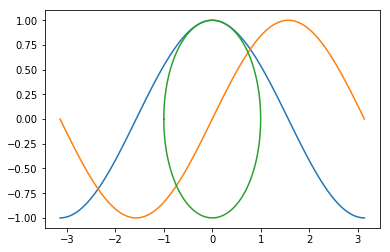

In [31]:
X = np.linspace(-np.pi, np.pi, 100)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.plot(C, S)
plt.show()

In [67]:
a = np.linspace(0, 10, 11)
even = a[::2]
rodd = a[9::-2]
print(even, rodd, sep='\n')

[ 0.  2.  4.  6.  8. 10.]
[9. 7. 5. 3. 1.]


In [72]:
a = np.ones((4,4))
a[2,3] += 1
a[3,1] += 5
print(a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 6. 1. 1.]]


In [83]:
a = np.zeros((6,5))
a[1:] = np.diag(np.arange(2,7))
print(a)

[[0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 6.]]


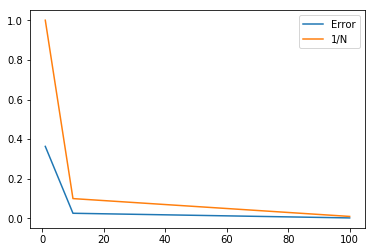

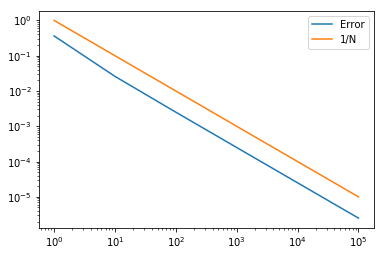

In [35]:
X = 10**np.arange(6)
error = [(np.pi - estimatePi(i))/np.pi for i in X]
prediction = [1/i for i in X]

end = 3
plt.plot(X[:end], error[:end], label="Error")
plt.plot(X[:end], prediction[:end], label="1/N")
plt.legend()
plt.show()

plt.loglog(X, error, label="Error")
plt.loglog(X, prediction, label="1/N")
plt.legend()
plt.show()